In [6]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



In [2]:
df = pd.read_excel('data/topics/complete_nola_2_25_24.xlsx')

In [3]:
df.head()

,Unnamed: 0,index,id_comment,author_comment,body,parent_id,date_comment,clean_text,Topic_0,Topic_1,...,Topic_2.1,Topic_3.1,Topic_4.1,Topic_5.1,Topic_6.1,Topic_7.1,Topic_8.1,Topic_9.1,Topic_10.1,top_topic
0,0,0,h79pqz7,The504Diesel,That building was absolutely electric that nig...,t3_ovi94e,2021-08-01 02:14:18,"['building', 'absolutely', 'electric', 'night'...",0.515346,0.421657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Topic_0
1,1,1,h7bsey2,jrotch123,I didn't say this picture specifically is love...,t1_h7bpde3,2021-08-01 16:15:27,"['picture', 'specifically', 'lovely', 'living'...",0.000000,0.000000,...,0.764596,0.148808,0.057470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Topic_2
2,2,2,h7d2qdr,Fixmystreets,This shows you what stupid zoning rules can do...,t3_ovir9z,2021-08-01 22:23:23,"['show', 'stupid', 'zoning', 'rule', 'thriving...",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.624295,0.317229,0.000000,0.000000,0.000000,0.000000,Topic_5
3,3,3,h7bo2mc,Dkillerbunny,My question is how does he and or is she get t...,t3_ovkq8p,2021-08-01 15:41:59,"['question', 'power']",0.030307,0.362831,...,0.030306,0.030306,0.030306,0.030306,0.030308,0.364412,0.030306,0.030305,0.030306,Topic_7
4,4,4,h7da15h,Foreign-Solution-833,Anyone actually read it? Good job OP. I like ...,t3_ovkq8p,2021-08-01 23:25:37,"['anyone', 'actually', 'read', 'good', 'like',...",0.000000,0.000000,...,0.000000,0.946421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Topic_3


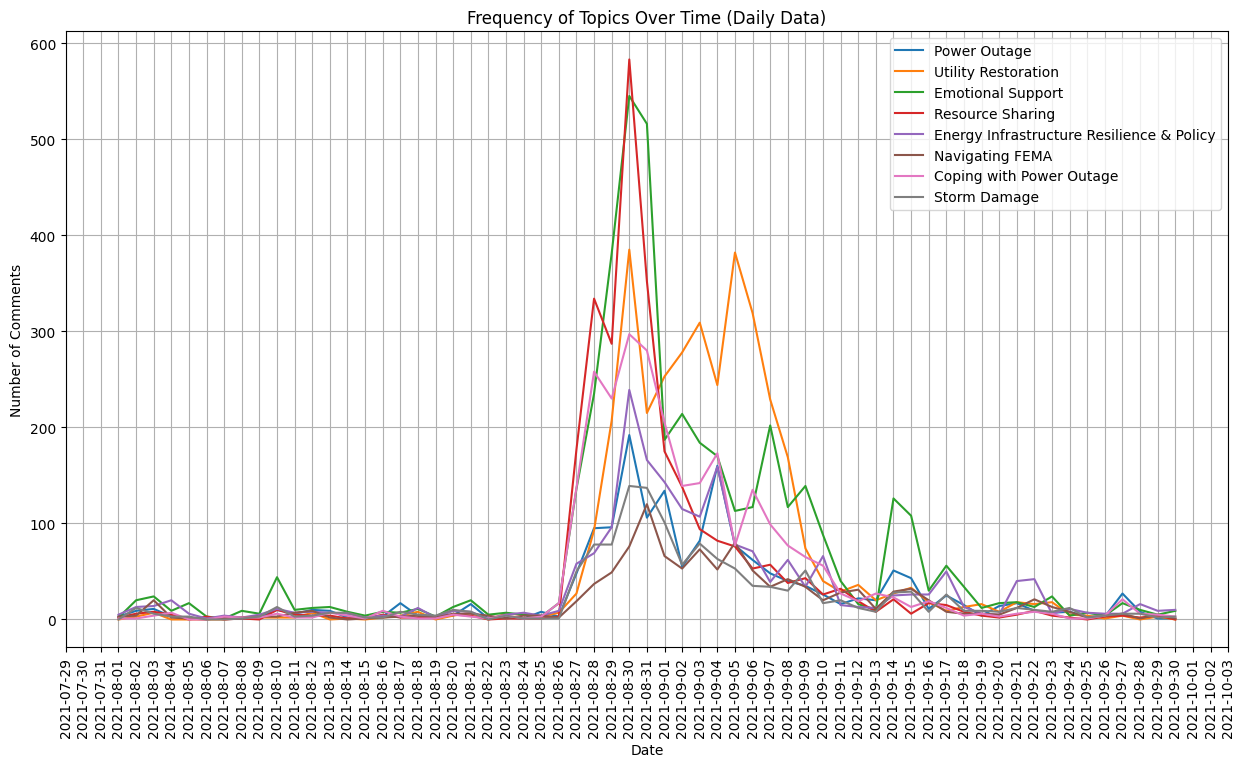

In [7]:
import matplotlib.pyplot as plt

# Convert 'date_comment' to datetime and sort the dataframe by this column
df['date_comment'] = pd.to_datetime(df['date_comment'])
df = df.sort_values(by='date_comment')

# Filter out the topics that are not of interest (Topics 4, 5, and 9)
topics_of_interest = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_10']
df_filtered = df[df['top_topic'].isin(topics_of_interest)]

# Group by date and top_topic, then count the number of occurrences
time_series_data = df_filtered.groupby([df_filtered['date_comment'].dt.date, 'top_topic']).size().unstack(fill_value=0)





# Mapping topic numbers to their descriptive names
topic_names = {
    'Topic_0': 'Power Outage',
    'Topic_1': 'Utility Restoration',
    'Topic_2': 'Emotional Support',
    'Topic_3': 'Resource Sharing',
    'Topic_6': 'Energy Infrastructure Resilience & Policy',
    'Topic_7': 'Navigating FEMA',
    'Topic_8': 'Coping with Power Outage',
    'Topic_10': 'Storm Damage'
}

# Plotting the original data with updated legend names
plt.figure(figsize=(15, 8))
for topic in topics_of_interest:
    plt.plot(time_series_data.index, time_series_data[topic], label=topic_names[topic])

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)

plt.title('Frequency of Topics Over Time (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
# It seems there was an error in the previous approach. Let's correct this and calculate the share of voice again.

# Calculating the total number of comments for each topic across all dates
total_comments_per_topic = time_series_data.sum()

# Calculating the share of voice for power-related discussions
# Power-related topics are: Topic_0 (Power Outage) and Topic_8 (Coping with Power Outage)
power_related_comments = total_comments_per_topic[['Topic_0', 'Topic_8']].sum()

# Total comments across all topics of interest
total_comments_interest = total_comments_per_topic[topics_of_interest].sum()

# Calculating the share of voice for power-related discussions
power_related_share_of_voice = power_related_comments / total_comments_interest * 100

power_related_share_of_voice


22.528237660529165

In [9]:
# Let's correct the calculation for the share of voice for power-related discussions

# Summing up the total counts for each topic to find the overall share of voice
total_comments_per_topic_corrected = df_filtered['top_topic'].value_counts()

# Calculating the share of voice for power-related discussions by summing up the relevant topics
power_related_share = total_comments_per_topic_corrected[['Topic_0', 'Topic_8']].sum()

# Total number of comments on all topics
total_comments_all = total_comments_per_topic_corrected.sum()

# Share of voice for power-related discussions in percentage
share_of_voice_power_related = (power_related_share / total_comments_all) * 100

share_of_voice_power_related


22.528237660529165

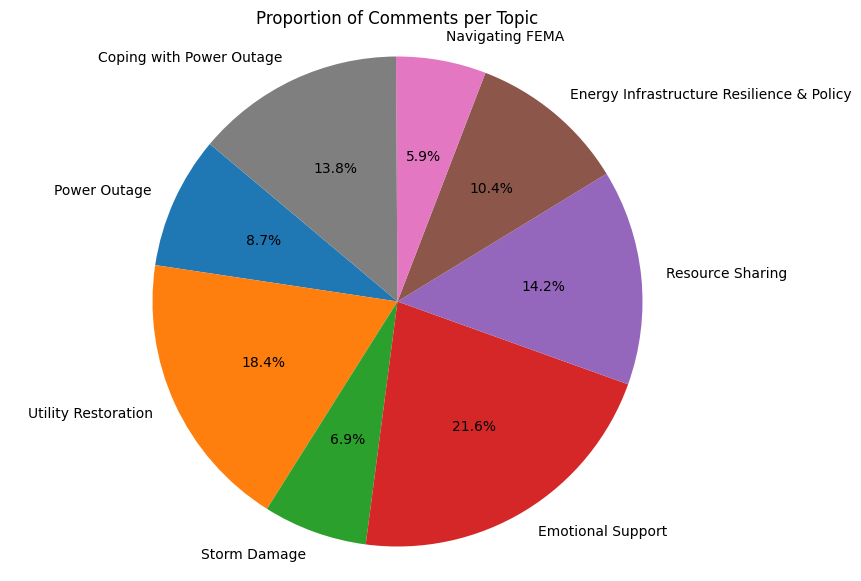

In [12]:
total_comments_per_topic = time_series_data.sum()

# 1. Pie Chart for All Topics of Interest
plt.figure(figsize=(10, 7))
total_comments_per_topic.plot(kind='pie', labels=[topic_names[topic] for topic in total_comments_per_topic.index], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Comments per Topic')
plt.axis('equal')  
plt.show()

In [13]:
power_related_topics = ['Topic_0', 'Topic_1', 'Topic_6', 'Topic_8']
power_related_total = total_comments_per_topic[power_related_topics].sum()
others_total = total_comments_per_topic.drop(power_related_topics).sum()

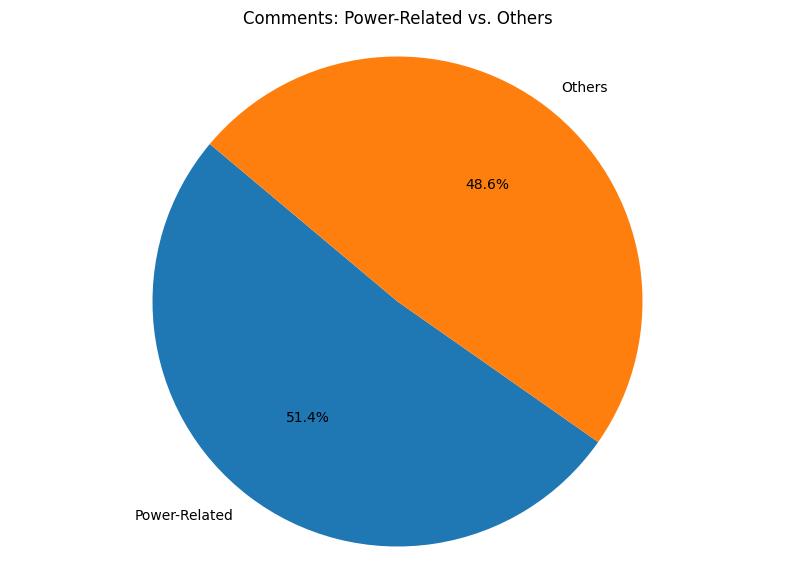

In [14]:
data_for_pie_chart = {'Power-Related': power_related_total, 'Others': others_total}
plt.figure(figsize=(10, 7))
plt.pie(data_for_pie_chart.values(), labels=data_for_pie_chart.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Comments: Power-Related vs. Others')
plt.axis('equal')  # Ensuring the pie chart is a circle
plt.show()